In [1]:
# load packages
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff


In [2]:
cicc_scatter = pd.read_csv('data/analysis/exploratory/cicc_scatter.csv')
cicc_scatterai = cicc_scatter[cicc_scatter['ai_activity_class'] == 1]

transform_dict = {'iloc_county_fips':'natural', 
                  'EMA_aipat_9yr_2011':'log',
                  'EMA_pat_9yr_2011':'log', 
                  'EMA_aipat_9yr_2019':'log', 
                  'EMA_pat_9yr_2019':'log',
                  'bach_pct_2011':'log', 
                  'burd_weight':'natural', 
                  'med_home_val_2011':'log', 
                  'pct_chg_mhv':'cube_root',
                  'fmr_2011':'log',
                  'pct_chg_fmr':'cube_root', 
                  'EMA_unemp_9yr_2011':'cube_root', 
                  'chg_EMA_unemp_9yr':'natural',
                  'NatAmenScale':'cube_root',
                  'EMA_ppk_chg':'log',
                  'EMA_aippk_chg':'log', 
                  'hh_agi':'log', 
                  'Individuals':'log',
                  'org_EMA_aipat_9yr_2011':'cube_root',
                  'org_EMA_pat_9yr_2011':'cube_root',
                  'org_EMA_aipat_9yr_2019':'cube_root',
                  'org_EMA_pat_9yr_2019':'cube_root', 
                  'org_bach_pct_2011':'log',
                  'org_Individuals':'cube_root',
                  'org_burd_weight':'natural', 
                  'org_med_home_val_2011':'log',
                  'org_pct_chg_mhv':'natural', 
                  'org_fmr_2011':'natural', 
                  'org_pct_chg_fmr':'natural',
                  'org_EMA_unemp_9yr_2011':'natural', 
                  'org_chg_EMA_unemp_9yr':'natural', 
                  'org_NatAmenScale':'cube_root',
                  'org_EMA_ppk_chg':'cube_root',
                  'org_EMA_aippk_chg':'cube_root', 
                  'net_pop_chg_domestic_indivs':'natural'}

def safe_cbrt(i):
    if i == 0:
        return 0
    else:
        return np.sign(i) * abs(i) ** (1/3)

def transform_df(df:pd.DataFrame, dict:dict) -> pd.DataFrame:
    _df = df
    _dict = dict
    for col in _dict.keys():
        _dist = {'natural': _df[col], 'cube_root': [safe_cbrt(i) for i in _df[col]], 'log': [np.log(i) for i in _df[col]]}
        _df[col] = _dist[_dict[col]]
        _df[col] = _df[col].fillna(np.mean(_df.loc[_df[col] != np.nan, col]))
    return _df
    
cicc_final = transform_df(cicc_scatterai, transform_dict)
cicc_final['ai_activity_class'] = pd.Categorical(cicc_final['ai_activity_class'])

display(cicc_final.isnull().sum())
display(cicc_final[cicc_final == np.inf].sum())
display(cicc_final.head(10))
display(cicc_final.describe())

C:\Users\TylerFrankenberg\AppData\Local\Temp\ipykernel_39724\4123563667.py:50: RuntimeWarning: invalid value encountered in log
  _dist = {'natural': _df[col], 'cube_root': [safe_cbrt(i) for i in _df[col]], 'log': [np.log(i) for i in _df[col]]}
C:\Users\TylerFrankenberg\AppData\Local\Temp\ipykernel_39724\4123563667.py:50: RuntimeWarning: divide by zero encountered in log
  _dist = {'natural': _df[col], 'cube_root': [safe_cbrt(i) for i in _df[col]], 'log': [np.log(i) for i in _df[col]]}


iloc_county_fips               0
EMA_aipat_9yr_2011             0
EMA_pat_9yr_2011               0
EMA_aipat_9yr_2019             0
EMA_pat_9yr_2019               0
bach_pct_2011                  0
Individuals                    0
burd_weight                    0
med_home_val_2011              0
pct_chg_mhv                    0
fmr_2011                       0
pct_chg_fmr                    0
EMA_unemp_9yr_2011             0
chg_EMA_unemp_9yr              0
NatAmenScale                   0
EMA_ppk_chg                    0
EMA_aippk_chg                  0
hh_agi                         0
org_EMA_aipat_9yr_2011         0
org_EMA_pat_9yr_2011           0
org_EMA_aipat_9yr_2019         0
org_EMA_pat_9yr_2019           0
org_bach_pct_2011              0
org_Individuals                0
org_burd_weight                0
org_med_home_val_2011          0
org_pct_chg_mhv                0
org_fmr_2011                   0
org_pct_chg_fmr                0
org_EMA_unemp_9yr_2011         0
org_chg_EM

C:\Users\TylerFrankenberg\AppData\Local\Temp\ipykernel_39724\4123563667.py:59: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  display(cicc_final[cicc_final == np.inf].sum())


iloc_county_fips               0.0
EMA_aipat_9yr_2011             0.0
EMA_pat_9yr_2011               0.0
EMA_aipat_9yr_2019             0.0
EMA_pat_9yr_2019               0.0
bach_pct_2011                  0.0
Individuals                    0.0
burd_weight                    0.0
med_home_val_2011              0.0
pct_chg_mhv                    0.0
fmr_2011                       0.0
pct_chg_fmr                    0.0
EMA_unemp_9yr_2011             0.0
chg_EMA_unemp_9yr              0.0
NatAmenScale                   0.0
EMA_ppk_chg                    0.0
EMA_aippk_chg                  0.0
hh_agi                         0.0
org_EMA_aipat_9yr_2011         0.0
org_EMA_pat_9yr_2011           0.0
org_EMA_aipat_9yr_2019         0.0
org_EMA_pat_9yr_2019           0.0
org_bach_pct_2011              0.0
org_Individuals                0.0
org_burd_weight                0.0
org_med_home_val_2011          0.0
org_pct_chg_mhv                0.0
org_fmr_2011                   0.0
org_pct_chg_fmr     

,iloc_county_fips,EMA_aipat_9yr_2011,EMA_pat_9yr_2011,EMA_aipat_9yr_2019,EMA_pat_9yr_2019,bach_pct_2011,Individuals,burd_weight,med_home_val_2011,pct_chg_mhv,...,org_pct_chg_mhv,org_fmr_2011,org_pct_chg_fmr,org_EMA_unemp_9yr_2011,org_chg_EMA_unemp_9yr,org_NatAmenScale,org_EMA_ppk_chg,org_EMA_aippk_chg,net_pop_chg_domestic_indivs,ai_activity_class
1,1003,0.141608,-2.423050,0.072890,-2.028286,-1.706242,10.623973,0.029183,12.076533,0.753818,...,0.373751,808.888889,0.185613,7.270763,-2.027792,1.052718,0.455404,2.014297,0.470826,1
2,1005,-2.581034,-2.308955,3.045963,-0.813553,-2.341404,7.505019,0.027186,11.425187,-0.368393,...,0.244536,724.600000,0.210880,7.381774,-1.974490,0.652478,0.352773,1.837670,-0.198664,1
4,1015,-0.036098,-2.711065,-0.824193,-3.197491,-2.253643,9.290080,0.026181,11.508917,0.489997,...,0.327373,738.513514,0.196530,7.648193,-2.347096,0.854735,0.398859,1.592834,-0.332316,1
9,1031,-1.767905,-2.821477,-1.316961,-3.176020,-1.973526,8.997841,0.023702,11.710136,0.304428,...,0.305186,753.848485,0.212885,7.314555,-1.890405,1.030666,0.370013,1.381258,-0.047492,1
13,1049,-3.769679,-3.089114,-0.765796,-2.088630,-2.660372,8.462332,0.025617,11.378251,0.548334,...,0.195221,661.250000,0.166698,7.311588,-2.116316,0.626264,0.320077,0.474299,-0.070356,1
14,1051,-0.819285,-2.453851,-0.766535,-2.187053,-1.969782,9.456573,0.024391,11.871998,0.448459,...,0.263605,674.035714,0.191830,7.657736,-2.198982,0.974724,0.445845,1.868617,-0.048546,1
16,1055,-1.092532,-3.031543,-1.907289,-2.922221,-2.258070,9.198999,0.032509,11.532728,0.466845,...,0.292092,728.137931,0.189575,7.334333,-2.153902,0.875811,0.405229,1.719794,0.022352,1
19,1065,-1.435561,-2.807867,3.045963,-0.813553,-2.684948,6.984536,0.020476,11.205041,0.417938,...,0.094512,536.000000,0.171642,9.667023,-3.032664,-0.896281,0.489386,2.169929,0.038896,1
20,1067,-1.528770,-2.536032,3.045963,-0.813553,-2.289834,7.623248,0.024793,11.462684,0.516087,...,0.013186,590.250000,0.190958,7.664221,-1.828289,-0.748887,0.230059,-0.201703,0.105613,1
22,1071,-1.106190,-2.685222,-1.361126,-2.262103,-2.361290,8.512253,0.022359,11.395267,0.494019,...,0.198268,660.875000,0.157280,7.430954,-2.170702,0.478233,0.319327,0.395070,-0.058488,1


,iloc_county_fips,EMA_aipat_9yr_2011,EMA_pat_9yr_2011,EMA_aipat_9yr_2019,EMA_pat_9yr_2019,bach_pct_2011,Individuals,burd_weight,med_home_val_2011,pct_chg_mhv,...,org_med_home_val_2011,org_pct_chg_mhv,org_fmr_2011,org_pct_chg_fmr,org_EMA_unemp_9yr_2011,org_chg_EMA_unemp_9yr,org_NatAmenScale,org_EMA_ppk_chg,org_EMA_aippk_chg,net_pop_chg_domestic_indivs
count,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,...,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000
mean,30594.016961,0.160835,-1.533855,0.451960,-1.236908,-1.943112,9.456837,0.043950,11.939244,0.631440,...,12.098300,0.366877,827.571036,0.208056,7.117432,-2.053784,0.316056,0.463617,1.816830,0.026456
std,15086.293359,2.141506,0.995124,2.426381,0.978239,0.369393,1.442758,0.016549,0.444009,0.171352,...,0.334087,0.154376,150.141933,0.046961,1.071086,0.572750,1.088664,0.185829,1.276984,0.302245
min,1003.000000,-3.992822,-3.932788,-5.837569,-3.919881,-3.102941,5.112657,0.007381,10.969921,-0.488780,...,11.221503,-0.193363,536.000000,-0.006790,3.189063,-4.074943,-1.654972,-0.755941,-3.176839,-3.984100
25%,18089.500000,-1.347930,-2.239776,-1.249676,-1.942747,-2.206416,8.422528,0.032497,11.623572,0.540450,...,11.835588,0.261196,705.469595,0.181377,6.589179,-2.359044,-0.891512,0.415726,1.352693,-0.090732
50%,29227.000000,-0.198776,-1.656544,0.277422,-1.227173,-1.957432,9.279763,0.043487,11.881726,0.633290,...,12.088350,0.360950,815.363370,0.206433,7.090030,-2.005565,0.866315,0.493574,2.187338,0.006657
75%,42120.500000,1.379017,-0.885130,2.425100,-0.656513,-1.690795,10.392603,0.053824,12.187399,0.729018,...,12.358617,0.447210,920.814076,0.232678,7.758455,-1.722663,1.145681,0.558066,2.527338,0.124668
max,56045.000000,8.233651,2.210145,8.494663,2.406466,-0.704302,14.403991,0.102816,13.642228,1.129563,...,13.036606,1.289500,1321.708333,0.517996,10.713296,-0.186285,1.966957,0.895051,5.201551,1.642747


In [3]:
from sklearn.model_selection import train_test_split

cicc_train, cicc_test = train_test_split(cicc_final, train_size=0.8, random_state=1)

In [4]:
import statsmodels.api as sm

lin_regs = {}
y = cicc_train['net_pop_chg_domestic_indivs']
x = {}

for col in cicc_train.columns:
    x[col] = cicc_train[col]
    x[col] = sm.add_constant(x[col])
    
    lm = sm.OLS(y, x[col]).fit()

    lin_regs[col] = lm

lin_regs_df = pd.DataFrame({
    'R-squared': [lin_regs[col].rsquared for col in cicc_train.columns],
    'R-squared_adj': [lin_regs[col].rsquared_adj for col in cicc_train.columns],
    'Fvalue': [lin_regs[col].fvalue for col in cicc_train.columns],
    'prob-F': [lin_regs[col].f_pvalue for col in cicc_train.columns],
    'sig_F': ['no' for col in cicc_train.columns],
    'log-likelihood': [lin_regs[col].llf for col in cicc_train.columns],
    'AIC': [lin_regs[col].aic for col in cicc_train.columns],
    'BIC': [lin_regs[col].bic for col in cicc_train.columns],
    'x-var': [col for col in cicc_train.columns],
    'pvalue': [lin_regs[col].pvalues[col] for col in cicc_train.columns],
    'sig_x': ['no' for col in cicc_train.columns]
    })

lin_regs_df.loc[lin_regs_df['prob-F'] < 0.05, 'sig_F'] = 'yes'
lin_regs_df.loc[lin_regs_df['pvalue'] < 0.05, 'sig_x'] = 'yes'

display(lin_regs_df.sort_values('R-squared', ascending=False))

,R-squared,R-squared_adj,Fvalue,prob-F,sig_F,log-likelihood,AIC,BIC,x-var,pvalue,sig_x
34,1.000000e+00,1.000000e+00,3.679241e+33,0.0,yes,41106.113781,-82208.227561,-82198.082718,net_pop_chg_domestic_indivs,0.000000e+00,yes
17,6.542188e-02,6.462784e-02,8.239177e+01,0.0,yes,-247.093363,498.186726,508.331570,hh_agi,4.579027e-19,yes
9,4.852963e-02,4.772124e-02,6.003274e+01,0.0,yes,-257.653269,519.306538,529.451382,pct_chg_mhv,2.005063e-14,yes
25,4.091701e-02,4.010216e-02,5.021393e+01,0.0,yes,-262.351029,528.702058,538.846902,org_med_home_val_2011,2.369362e-12,yes
27,3.336793e-02,3.254667e-02,4.062979e+01,0.0,yes,-266.972901,537.945802,548.090646,org_fmr_2011,2.635879e-10,yes
8,2.394880e-02,2.311953e-02,2.887937e+01,0.0,yes,-272.689345,549.378691,559.523534,med_home_val_2011,9.279939e-08,yes
22,2.205445e-02,2.122357e-02,2.654349e+01,0.0,yes,-273.832360,551.664720,561.809564,org_bach_pct_2011,3.019054e-07,yes
14,2.192718e-02,2.109619e-02,2.638688e+01,0.0,yes,-273.909070,551.818139,561.962983,NatAmenScale,3.268158e-07,yes
21,1.287968e-02,1.204100e-02,1.535718e+01,0.000094,yes,-279.337077,562.674154,572.818998,org_EMA_pat_9yr_2019,9.410805e-05,yes
33,1.286508e-02,1.202639e-02,1.533954e+01,0.000095,yes,-279.345797,562.691595,572.836438,org_EMA_aippk_chg,9.497923e-05,yes


In [5]:
cicc_lm = lin_regs['hh_agi']
X = x['hh_agi']

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid
    
    fig1 = px.scatter(x=fitted_vals, y=y, trendline="lowess", trendline_color_override="red")
    fig1.update_layout(title='Observed vs. Predicted Values')

    fig2 = px.scatter(x=fitted_vals, y=resids, trendline="lowess", trendline_color_override="red")
    fig2.update_layout(title='Residuals vs. Predicted Values')
    
    fig1.show()
    fig2.show()

linearity_test(cicc_lm, y)    


In [90]:
cicc_lm.resid.mean()

-9.40779302242748e-16

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,const,hh_agi
vif,1.0,1.0


In [6]:
import statsmodels.stats.api as sms

def homoscedasticity_test(model):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig1 = px.scatter(x=fitted_vals, y=resids, trendline="lowess", trendline_color_override="red")
    fig1.update_layout(title='Residuals vs. Predicted Values')

    fig2 = px.scatter(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), trendline="lowess", trendline_color_override="red")
    fig2.update_layout(title='Scale-Location')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')

    fig1.show()
    fig2.show()

homoscedasticity_test(cicc_lm)


 Breusch-Pagan test ----
                                  value
Lagrange multiplier statistic  0.834245
p-value                        0.361048
f-value                        0.833354
f p-value                      0.361506

 Goldfeld-Quandt test ----
                value
F statistic  1.113869
p-value      0.104425

 Residuals plots ----


C:\Users\TylerFrankenberg\AppData\Local\Temp\ipykernel_8764\113061791.py:4: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



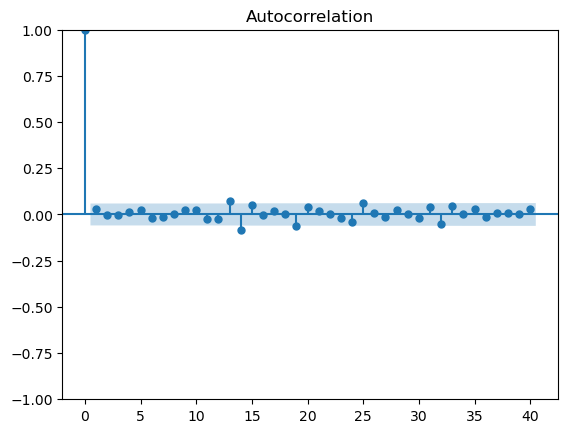

In [93]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(cicc_lm.resid, lags=40 , alpha=0.05)
acf.show()

In [94]:
from scipy.stats import pearsonr

for column in X.columns:
    corr_test = pearsonr(X[column], cicc_lm.resid)
    print(f'Variable: {column} --- correlation: {corr_test[0]:.4f}, p-value: {corr_test[1]:.4f}')

Variable: const --- correlation: nan, p-value: nan
Variable: hh_agi --- correlation: -0.0000, p-value: 1.0000


c:\Users\TylerFrankenberg\anaconda3\envs\MSCapstone\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



In [95]:
X.apply(np.var, axis=0)

const     0.000000
hh_agi    0.077103
dtype: float64

Jarque-Bera test ---- statistic: 2510.2843, p-value: 0.0
Shapiro-Wilk test ---- statistic: 0.8888, p-value: 0.0000
Kolmogorov-Smirnov test ---- statistic: 0.3236, p-value: 0.0000
Anderson-Darling test ---- statistic: 27.7035, 5% critical value: 0.7840
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


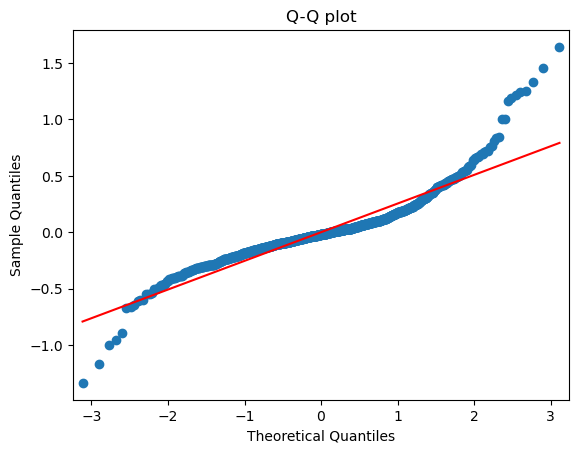

In [96]:
from scipy import stats
from matplotlib import pyplot as plt

def normality_of_residuals_test(model):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to 
    investigate the normality of residuals.
    
    Arg:
    * model - fitted OLS models from statsmodels
    '''
    sm.ProbPlot(model.resid).qqplot(line='s');
    plt.title('Q-Q plot');

    jb = stats.jarque_bera(model.resid)
    sw = stats.shapiro(model.resid)
    ad = stats.anderson(model.resid, dist='norm')
    ks = stats.kstest(model.resid, 'norm')
    
    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')
    
normality_of_residuals_test(cicc_lm)